In [21]:
import torch
from torchvision import transforms as T
from matplotlib import pyplot as plt
from PIL import Image

In [26]:
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
model = torch.load('Unet-Mobilenet.pt')
model.eval()

In [51]:
def inf(img):
    t = T.Compose([T.ToTensor(), T.Normalize(mean, std)])
    img = t(img)
    img_patches = img.unfold(1, 512, 284).unfold(2, 768, 654) 
    img_patches  = img_patches.contiguous().view(3,-1, 512, 768) 
    img_patches = img_patches.permute(1,0,2,3)
    with torch.no_grad():
        output = model(img_patches.to('cuda')).cpu()
    return img_patches,output

In [54]:
img = Image.open("/home/ad/stanford/1.png") 

In [55]:
img_patches, output = inf(img)
masked = torch.argmax(output, dim=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


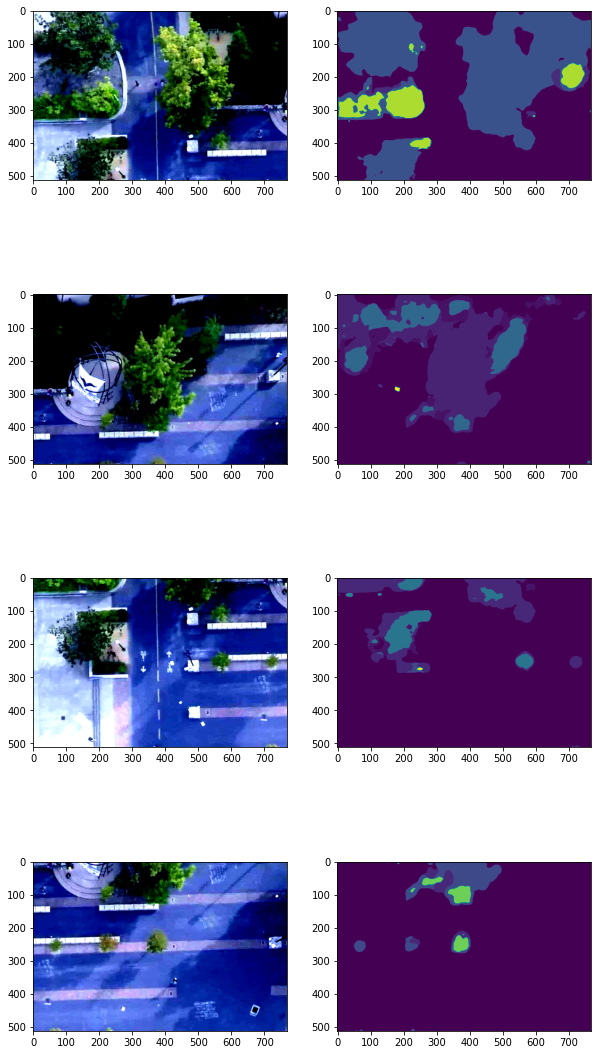

In [56]:
fig, ax = plt.subplots(4,2, figsize=(10,20))
for i in range(4):
    ax[i,0].imshow(img_patches[i].permute(1,2,0))
    ax[i,1].imshow(masked[i])

In [ ]:
fig, (ax1,  ax3) = plt.subplots(1,2, figsize=(20,10))
# image = image.squeeze(0)
# image = image.cpu()
image = image.permute(1,2,0)
ax1.imshow(image)
ax1.set_title('Picture');

# image = image.squeeze(0)

ax3.imshow(masked.cpu())
# ax3.set_title('UNet-MobileNet | mIoU {:.3f}'.format(score3))
# ax3.set_axis_off()